In [43]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
import matplotlib.image as mpimg
from pymatgen.electronic_structure.core import Spin
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import *
with MPRester ("puId7PZyCiPcHGVBKl") as m:
    bs = m.get_bandstructure_by_material_id("mp-9366") #BandStructure object

In [42]:
print("Band gap =",bs.get_band_gap()['energy'],"[eV]")

Band gap = 2.3355000000000006 [eV]


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

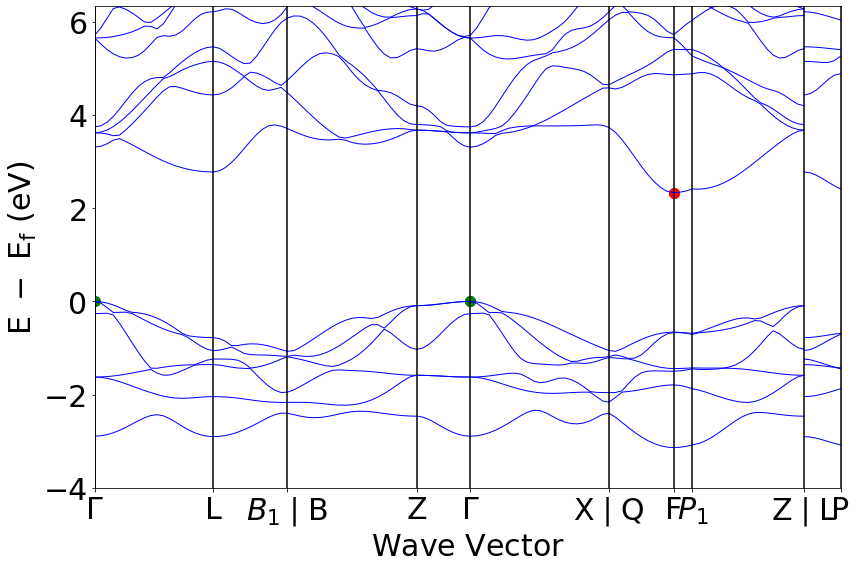

In [22]:
BSplot = BSPlotter(bs) #BSPlotter object
BSplot.get_plot(vbm_cbm_marker=True)

In [23]:
BranchEnergies = BSplot.bs_plot_data()['energy'] #Tableau de taille 9 qui contient les énergies des branches
Branchk = BSplot.bs_plot_data()['distances'] #Tableau de taille 9 qui contient les abscisses des branches
print(bs.get_vbm()['band_index'] , "==> Les bandes de valence 13 et 14 contiennent l'énergie la plus haute")
print(bs.get_cbm()['band_index'] , "==> La 15e bande contient l'énergie la plus basse de la bande de conduction")

defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]}) ==> Les bandes de valence 13 et 14 contiennent l'énergie la plus haute
defaultdict(<class 'list'>, {<Spin.up: 1>: [15]}) ==> La 15e bande contient l'énergie la plus basse de la bande de conduction


In [37]:
#Recherche des plus petites et fortes pentes
def absoluteslope(y,x): #Retourne une pente en valeur absolue
    return abs(y/x)
distance = np.zeros(len(Branchk))
for i in range(len(Branchk)): #Remplit un tableau contenant les différences d'abscisses
    distance[i] = Branchk[i][0]-Branchk[i][-1]
heightv = np.zeros(len(BranchEnergies)) 
heightc = np.zeros(len(BranchEnergies))
for i in range(len(BranchEnergies)): #Remplit deux tableaux contenants les différences d'ordonnées pour la plus haute bande de valence et la plus basse bande de conduction
    heightv[i] = BranchEnergies[i]['1'][14][0] - BranchEnergies[i]['1'][14][-1]
    heightc[i] = BranchEnergies[i]['1'][15][0] - BranchEnergies[i]['1'][15][-1]
slopev = 0 ; maxslopev = 0 ; minslopev = 1000 ; maxindexv = 0 ; minindexv = 0
slopec = 0 ; maxslopec = 0 ; minslopec = 1000 ; maxindexc = 0 ; minindexc = 0
for i in range(len(Branchk)):
    slopev = absoluteslope(heightv[i],distance[i]) ; slopec = absoluteslope(heightc[i],distance[i])
    if slopev >= maxslopev: 
        maxslopev = slopev
        maxindexv = i
    if slopev <= minslopev:
        minslopev = slopev
        minindexv = i
    if slopec >= maxslopec: 
        maxslopec = slopec
        maxindexc = i
    if slopec <= minslopec: 
        minslopec = slopec
        minindexc = i
print("En comptant les branches de gauche à droite à partir de 0")
print("--bande de valence--")
print("Branche avec la plus petite pente:",minindexv,"\t Valeur de cette pente:",minslopev)
print("Branche avec la plus grande pente:",maxindexv,"\t Valeur de cette pente:",maxslopev)
print("--bande de conduction--")
print("Branche avec la plus petite pente:",minindexc,"\t Valeur de cette pente:",minslopec)
print("Branche avec la plus grande pente:",maxindexc,"\t Valeur de cette pente:",maxslopec)

En comptant les branches de gauche à droite à partir de 0
--bande de valence--
Branche avec la plus petite pente: 6 	 Valeur de cette pente: 0.18578794944762725
Branche avec la plus grande pente: 4 	 Valeur de cette pente: 0.9985812572117119
--bande de conduction--
Branche avec la plus petite pente: 2 	 Valeur de cette pente: 0.03531110223111521
Branche avec la plus grande pente: 5 	 Valeur de cette pente: 2.8495142737791954


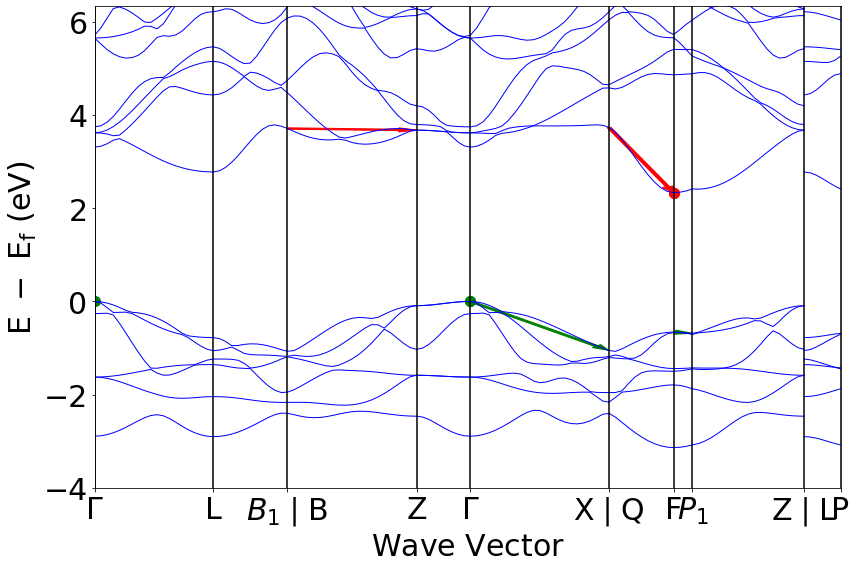

In [25]:
#On affiche les pentes sur la structure de bande
BSplot.get_plot(vbm_cbm_marker=True)
plt.arrow(Branchk[minindexv][0],BranchEnergies[minindexv]['1'][14][0],Branchk[minindexv][-1]-Branchk[minindexv][0],BranchEnergies[minindexv]['1'][14][-1]-BranchEnergies[minindexv]['1'][14][0],width = 0.03,length_includes_head=True,color='green') #Flèche pour la plus petite pente de la bande de valence
plt.arrow(Branchk[maxindexv][0],BranchEnergies[maxindexv]['1'][14][0],Branchk[maxindexv][-1]-Branchk[maxindexv][0],BranchEnergies[maxindexv]['1'][14][-1]-BranchEnergies[maxindexv]['1'][14][0],width = 0.03,length_includes_head=True,color='green') #Flèche pour la plus grande pente de la bande de valence
plt.arrow(Branchk[minindexc][0],BranchEnergies[minindexc]['1'][15][0],Branchk[minindexc][-1]-Branchk[minindexc][0],BranchEnergies[minindexc]['1'][15][-1]-BranchEnergies[minindexc]['1'][15][0],width = 0.03,length_includes_head=True,color='red') #Flèche pour la plus petite pente de la bande de conduction
plt.arrow(Branchk[maxindexc][0],BranchEnergies[maxindexc]['1'][15][0],Branchk[maxindexc][-1]-Branchk[maxindexc][0],BranchEnergies[maxindexc]['1'][15][-1]-BranchEnergies[maxindexc]['1'][15][0],width = 0.03,length_includes_head=True,color='red') #Flèche pour la plus grande pente de la bande de conduction
plt.show()

In [26]:
#Tableaux contenant les abscisses et ordonnées des branches intéressantes pour la masse effective
ZGamma_x = Branchk[3] ; GammaX_x = Branchk[4] ; QF_x = Branchk[5] ; FP1_x = Branchk[6] #abscisses
ZGamma_y14 = BranchEnergies[3]['1'][14] ; GammaX_y14 = BranchEnergies[4]['1'][14] #Ordonnées pour la bande de valence
QF_y15 = BranchEnergies[5]['1'][15] ; FP1_y15 = BranchEnergies[6]['1'][15] #Ordonnées pour la bande de conduction

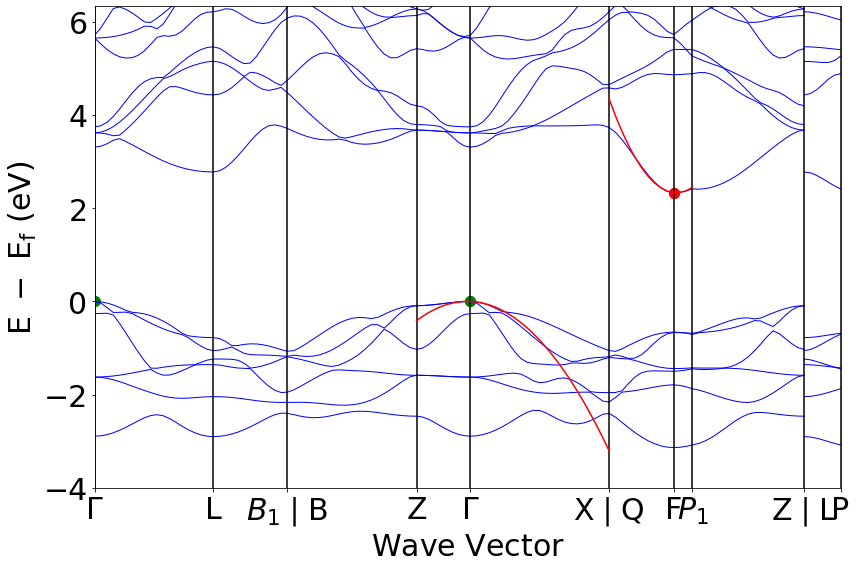

In [27]:
#On prend 3 points à droite et 3 points à gauche du maximum et du minimum
xv = np.append(ZGamma_x[-3:],GammaX_x[0:3]) ; xc = np.append(QF_x[-3:],FP1_x[0:3]) #Abscisses utilisées pour le fit de la parabole
yv = np.append(ZGamma_y14[-3:],GammaX_y14[0:3]) ; yc = np.append(QF_y15[-3:],FP1_y15[0:3]) #Ordonnées utilisées pour le fit de la parabole
coefv = np.polyfit(xv,yv,2) ; coefc = np.polyfit(xc,yc,2) #Coefficients obtenus pour le fit de la parabole
xvplot = np.append(ZGamma_x,GammaX_x) ; xcplot = np.append(QF_x,FP1_x) #Abscisses utilisées pour le plot
yvplot = np.append(ZGamma_y14,GammaX_y14) ; ycplot = np.append(QF_y15,FP1_y15) #Ordonnées utilisées pour le plot
BSplot.get_plot(vbm_cbm_marker=True) #Plot de la structure de bandes
plt.plot(xvplot,coefv[0]*xvplot**2+coefv[1]*xvplot+coefv[2],color='red') #Plot de la parabole pour la bande de valence
plt.plot(xcplot,coefc[0]*xcplot**2+coefc[1]*xcplot+coefc[2],color='red') #Plot de la parabole pour la bande de conduction
plt.show()

Le but est de déterminer la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction.
Étant déjà de base symétrique, on peut réduire le tenseur des masses effectives en 3 composantes indépendantes sur la diagonale.
En supposant une dispersion parabolique, la masse effective est supposée isotrope ce qui implique que le tenseur des masses effectives dégénère en un scalaire.
Ce scalaire se calcule aisément, la formule est rappelée


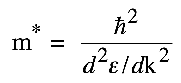

Pour avoir une masse en kg, on doit diviser par la valeur d'un eV et par le carré d'un angström. Pour avoir une masse en masse électronique, on divise par la masse de l'électron dans le vide.

Au sommet de la bande de valence : 	 m_eff = -1.3787428304292857 [m_e]
À la base de la bande de conduction : 	 m_eff =  0.4932805073613271 [m_e]


In [40]:
print("Le but est de déterminer la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction.")
print("Étant déjà de base symétrique, on peut réduire le tenseur des masses effectives en 3 composantes indépendantes sur la diagonale.")
print("En supposant une dispersion parabolique, la masse effective est supposée isotrope ce qui implique que le tenseur des masses effectives dégénère en un scalaire.")
print("Ce scalaire se calcule aisément, la formule est rappelée")
plt.figure(figsize = (3,3))
plt.imshow(mpimg.imread('Masse_effective.png'))
plt.axis('off')
plt.show()
print("Pour avoir une masse en kg, on doit diviser par la valeur d'un eV et par le carré d'un angström. Pour avoir une masse en masse électronique, on divise par la masse de l'électron dans le vide.\n")
print("Au sommet de la bande de valence : \t","m_eff =" ,(sc.hbar)**2/(10**(-20)*sc.e*2*coefv[0]*sc.m_e),"[m_e]")
print("À la base de la bande de conduction : \t","m_eff = ",(sc.hbar)**2/(10**(-20)*sc.e*2*coefc[0]*sc.m_e),"[m_e]")